In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

In [35]:
%pwd

'/home/lawrence/homework_fall2021/hw4'

In [20]:
np.random.normal(loc=[[1,2,3], [4,5,6]], scale=[[0.1, 0.2, 0.3], [0.1, 0.2, 0.3]], size = (4,2,3))

array([[[0.95591979, 2.0757183 , 2.59970717],
        [3.83218795, 5.0857714 , 6.03920365]],

       [[0.87430893, 2.03256603, 3.12156933],
        [4.02258917, 5.41059164, 6.46135575]],

       [[0.96551981, 1.80750367, 2.58753253],
        [4.17258391, 5.04614349, 6.20539288]],

       [[1.07116951, 1.71556016, 3.34023172],
        [4.06640002, 5.36464886, 5.64317422]]])

# MBRL
## Experiment 2: MPC

In [5]:
# Basic DQN on MsPacman-v0
ea_q2 = event_accumulator.EventAccumulator('data/hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_03-11-2021_22-34-50/events.out.tfevents.1636004090.triton2')
ea_q2 = ea_q2.Reload()
ea_list = [ea_q2]
ea_q2.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [6]:
def get_summary_df(ea):
    result = pd.DataFrame(ea.Scalars('Train_AverageReturn'))
    result = result.rename(columns={"value": "Train_AverageReturn"})
    result['Eval_AverageReturn'] = [e.value for e in ea.Scalars('Eval_AverageReturn')]  
    return result

In [8]:
result = get_summary_df(ea_q2)
result

,wall_time,step,Train_AverageReturn,Eval_AverageReturn
0,1.636004e+09,0,-163.640549,-43.810829


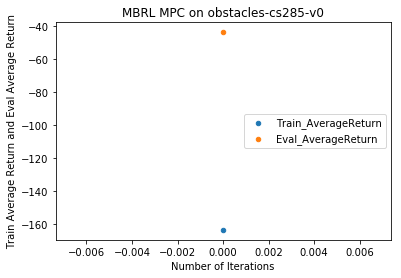

In [15]:
fig = plt.figure()
plt.scatter(result.step, result.Train_AverageReturn, s=20, label = "Train_AverageReturn")
plt.scatter(result.step, result.Eval_AverageReturn, s=20, label = "Eval_AverageReturn")
plt.legend(loc='center right')
plt.title('MBRL MPC on obstacles-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Train Average Return and Eval Average Return')
plt.show()

## Experiment 3: MBRL with on-policy data collection and iterative dynamic model training

In [47]:
ea_q3_obstacles = event_accumulator.EventAccumulator('data/hw4_q3_obstacles_obstacles-cs285-v0_03-11-2021_22-54-35/events.out.tfevents.1636005275.triton2')
ea_q3_reacher = event_accumulator.EventAccumulator('data/hw4_q3_reacher_reacher-cs285-v0_03-11-2021_22-55-08/events.out.tfevents.1636005308.triton2')
ea_q3_cheetah = event_accumulator.EventAccumulator('data/hw4_q3_cheetah_cheetah-cs285-v0_03-11-2021_22-55-40/events.out.tfevents.1636005340.triton2')
ea_list = [ea_q3_obstacles, ea_q3_reacher, ea_q3_cheetah]
ea_list = [ea.Reload() for ea in ea_list]
ea_q3_obstacles.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [48]:
def get_summary_df_ac(ea):
    result = pd.DataFrame(ea.Scalars('Eval_AverageReturn'))
    result = result.rename(columns={"value": "Eval_AverageReturn"})
    result['Eval_StdReturn'] = [e.value for e in ea.Scalars('Eval_StdReturn')]
    result['Train_AverageReturn'] = [e.value for e in ea.Scalars('Train_AverageReturn')]
    return result

In [49]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636005e+09,0,-43.810829,33.373539,-163.640549
1,1.636005e+09,1,-50.288200,43.200123,-47.441189
2,1.636005e+09,2,-43.974316,42.680573,-39.038147
3,1.636006e+09,3,-49.246181,31.061838,-39.351486
4,1.636006e+09,4,-34.247440,40.508656,-31.238031
5,1.636006e+09,5,-37.180550,22.612223,-28.757816
6,1.636006e+09,6,-70.279907,57.666653,-30.485722
7,1.636006e+09,7,-26.714472,11.818704,-32.278587
8,1.636006e+09,8,-26.384037,15.211407,-24.012829
9,1.636006e+09,9,-28.745605,18.443727,-26.349892


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636005e+09,0,-799.562439,133.127991,-1862.003418
1,1.636006e+09,1,-326.636963,10.982620,-818.702820
2,1.636006e+09,2,-287.276428,10.341812,-322.494568
3,1.636006e+09,3,-299.747101,9.600067,-282.984039
4,1.636006e+09,4,-275.585449,11.110870,-269.861603
5,1.636007e+09,5,-263.654999,12.536308,-259.043060
6,1.636007e+09,6,-262.406281,28.004631,-261.690582
7,1.636008e+09,7,-257.284027,5.567833,-264.795685
8,1.636008e+09,8,-251.005508,4.491867,-265.550262
9,1.636008e+09,9,-263.818054,0.865692,-254.013580


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,93.818787,0.0,-2493.047607
1,1.636006e+09,1,250.603134,0.0,127.231529
2,1.636007e+09,2,179.226990,0.0,252.762238
3,1.636007e+09,3,332.454590,0.0,265.261780
4,1.636008e+09,4,292.683624,0.0,291.051727
5,1.636008e+09,5,240.802887,0.0,285.191223
6,1.636009e+09,6,350.854034,0.0,279.587219
7,1.636009e+09,7,318.028229,0.0,315.168915
8,1.636010e+09,8,257.459167,0.0,284.484741
9,1.636010e+09,9,303.183044,0.0,305.757385


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


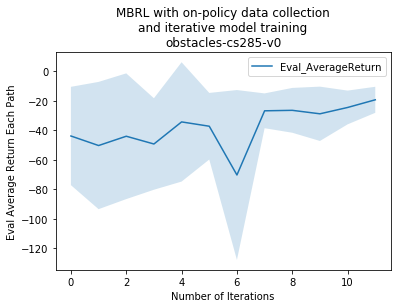

In [50]:
fig = plt.figure()
i = 0
result = result_list[i]
plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = 'Eval_AverageReturn')
plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                 y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('MBRL with on-policy data collection\nand iterative model training\nobstacles-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

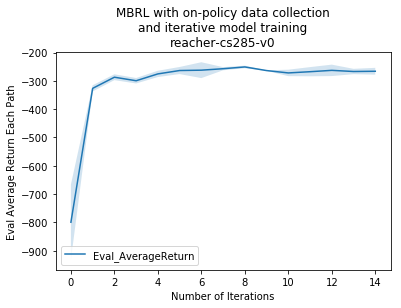

In [51]:
fig = plt.figure()
i = 1
result = result_list[i]
plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = 'Eval_AverageReturn')
plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                 y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('MBRL with on-policy data collection\nand iterative model training\nreacher-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

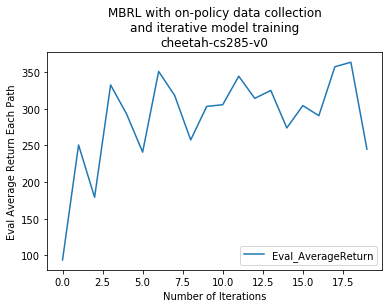

In [52]:
fig = plt.figure()
i = 2
result = result_list[i]
plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = 'Eval_AverageReturn')
plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                 y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('MBRL with on-policy data collection\nand iterative model training\ncheetah-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

## Experiment 4: Compare the performance of your MBRL algorithm as a function of three hyperparameters: the number of models in your ensemble, the number of random action sequences considered during each action selection, and the MPC planning horizon

### Ensemble

In [30]:
ea_q4_ensemble1 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_ensemble1_reacher-cs285-v0_03-11-2021_23-03-52/events.out.tfevents.1636005832.triton2')
ea_q4_ensemble3 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_ensemble3_reacher-cs285-v0_03-11-2021_23-04-03/events.out.tfevents.1636005843.triton2')
ea_q4_ensemble5 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_ensemble5_reacher-cs285-v0_03-11-2021_23-04-15/events.out.tfevents.1636005855.triton2')
ea_list = [ea_q4_ensemble1, ea_q4_ensemble3, ea_q4_ensemble5]
ea_list = [ea.Reload() for ea in ea_list]
ea_q4_ensemble1.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [31]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-387.390350,4.507233,-1887.639648
1,1.636006e+09,1,-295.902649,12.079117,-462.114685
2,1.636006e+09,2,-284.042572,3.001648,-344.235107
3,1.636006e+09,3,-322.674866,23.991028,-295.071381
4,1.636006e+09,4,-278.727753,1.750977,-289.154907
5,1.636007e+09,5,-282.596313,1.024231,-300.126404
6,1.636007e+09,6,-268.849731,2.143784,-292.960815
7,1.636007e+09,7,-266.568359,4.973511,-272.392059
8,1.636007e+09,8,-267.515991,11.695778,-272.334503
9,1.636007e+09,9,-265.876221,3.302887,-287.385529


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-392.989929,0.229630,-1887.639648
1,1.636006e+09,1,-274.209412,1.419281,-406.220520
2,1.636006e+09,2,-284.243500,29.267586,-283.446686
3,1.636007e+09,3,-270.141052,4.986069,-275.310150
4,1.636007e+09,4,-264.529846,2.309418,-275.059967
5,1.636007e+09,5,-258.136292,11.625900,-287.913330
6,1.636007e+09,6,-250.820496,1.435112,-264.972229
7,1.636007e+09,7,-268.713806,9.491745,-259.834991
8,1.636007e+09,8,-258.703735,6.577118,-257.627350
9,1.636008e+09,9,-261.415070,3.294159,-270.812988


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-530.441956,120.622849,-1887.639648
1,1.636006e+09,1,-298.563629,2.504822,-385.056946
2,1.636007e+09,2,-271.509521,12.388977,-268.591278
3,1.636007e+09,3,-296.625214,1.610443,-315.166931
4,1.636007e+09,4,-260.272827,6.604202,-274.583038
5,1.636007e+09,5,-250.684906,25.580994,-275.194244
6,1.636008e+09,6,-294.343567,24.359207,-264.556305
7,1.636008e+09,7,-256.558990,6.269615,-327.491150
8,1.636008e+09,8,-278.633240,13.161179,-263.072327
9,1.636008e+09,9,-278.636871,1.910065,-248.008743


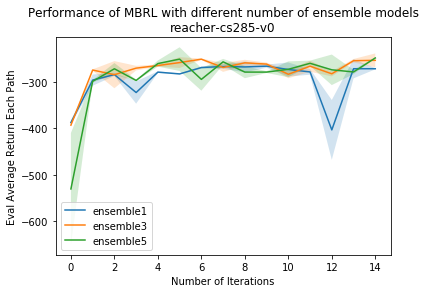

In [33]:
fig = plt.figure()
label_list = ['ensemble1', 'ensemble3', 'ensemble5']
for i in range(3):
    result = result_list[i]
    plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[i])
    plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                     y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('Performance of MBRL with different number of ensemble models\nreacher-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

### Horizon

In [56]:
ea_q4_horizon5 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_horizon5_reacher-cs285-v0_03-11-2021_23-02-29/events.out.tfevents.1636005749.triton2')
ea_q4_horizon15 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_horizon15_reacher-cs285-v0_03-11-2021_23-02-47/events.out.tfevents.1636005767.triton2')
ea_q4_horizon30 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_horizon30_reacher-cs285-v0_03-11-2021_23-03-01/events.out.tfevents.1636005781.triton2')
ea_list = [ea_q4_horizon5, ea_q4_horizon15, ea_q4_horizon30]
ea_list = [ea.Reload() for ea in ea_list]
ea_q4_horizon5.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [57]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-724.564758,75.161316,-1887.639648
1,1.636006e+09,1,-298.554443,32.397614,-701.820312
2,1.636006e+09,2,-306.960083,28.589539,-305.078918
3,1.636006e+09,3,-266.794861,11.104111,-292.077332
4,1.636006e+09,4,-276.477631,7.319763,-267.339600
5,1.636007e+09,5,-316.243896,36.620850,-259.947937
6,1.636007e+09,6,-287.681976,47.493416,-347.406708
7,1.636007e+09,7,-318.798706,50.525467,-342.639038
8,1.636007e+09,8,-380.706726,43.185883,-380.857239
9,1.636007e+09,9,-505.634552,82.040863,-310.625000


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-409.506775,34.166489,-1887.639648
1,1.636006e+09,1,-281.537659,10.466827,-401.459198
2,1.636006e+09,2,-310.964966,26.426651,-296.407745
3,1.636007e+09,3,-272.460327,5.241257,-292.625214
4,1.636007e+09,4,-275.066101,10.513626,-289.992096
5,1.636007e+09,5,-268.545288,15.204041,-289.364716
6,1.636007e+09,6,-275.552490,16.588470,-282.925812
7,1.636007e+09,7,-290.868866,12.678986,-278.458740
8,1.636008e+09,8,-290.776947,7.734009,-275.343994
9,1.636008e+09,9,-279.070007,5.830505,-283.960815


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-467.986389,55.543015,-1887.639648
1,1.636006e+09,1,-342.613892,3.512970,-441.380829
2,1.636007e+09,2,-349.254150,43.024490,-371.547302
3,1.636007e+09,3,-402.337036,24.074738,-351.417908
4,1.636007e+09,4,-329.361633,0.252869,-342.068237
5,1.636008e+09,5,-341.087677,5.747162,-340.822815
6,1.636008e+09,6,-353.646423,13.317383,-375.186279
7,1.636008e+09,7,-320.069214,17.202835,-347.207520
8,1.636009e+09,8,-352.244965,53.265564,-357.901642
9,1.636009e+09,9,-328.375793,16.450027,-349.758087


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


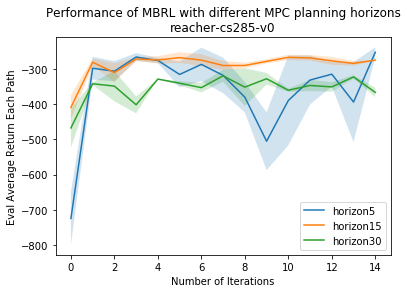

In [58]:
fig = plt.figure()
label_list = ['horizon5', 'horizon15', 'horizon30']
for i in range(3):
    result = result_list[i]
    plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[i])
    plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                     y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('Performance of MBRL with different MPC planning horizons\nreacher-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

### Num Seq

In [39]:
ea_q4_numseq100 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_numseq100_reacher-cs285-v0_03-11-2021_23-03-26/events.out.tfevents.1636005806.triton2')
ea_q4_numseq1000 = event_accumulator.EventAccumulator('data/hw4_q4_reacher_numseq1000_reacher-cs285-v0_03-11-2021_23-03-40/events.out.tfevents.1636005820.triton2')
ea_list = [ea_q4_numseq100, ea_q4_numseq1000]
ea_list = [ea.Reload() for ea in ea_list]
ea_q4_numseq100.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [40]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-464.147034,49.087524,-1887.639648
1,1.636006e+09,1,-356.426941,19.512878,-437.632233
2,1.636006e+09,2,-307.382568,20.849594,-343.345215
3,1.636006e+09,3,-304.939209,11.323135,-309.002808
4,1.636007e+09,4,-308.187195,6.320358,-291.442078
5,1.636007e+09,5,-297.013062,0.559494,-331.872711
6,1.636007e+09,6,-400.418579,81.086502,-320.762939
7,1.636007e+09,7,-291.637878,4.551880,-307.193512
8,1.636007e+09,8,-281.967133,13.984772,-295.457336
9,1.636007e+09,9,-304.010925,25.078903,-284.054504


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636006e+09,0,-392.989929,0.229630,-1887.639648
1,1.636006e+09,1,-274.209412,1.419281,-406.220520
2,1.636006e+09,2,-284.243500,29.267586,-283.446686
3,1.636007e+09,3,-270.141052,4.986069,-275.310150
4,1.636007e+09,4,-264.529846,2.309418,-275.059967
5,1.636007e+09,5,-258.136292,11.625900,-287.913330
6,1.636007e+09,6,-250.820496,1.435112,-264.972229
7,1.636007e+09,7,-268.713806,9.491745,-259.834991
8,1.636007e+09,8,-258.703735,6.577118,-257.627350
9,1.636008e+09,9,-261.415070,3.294159,-270.812988


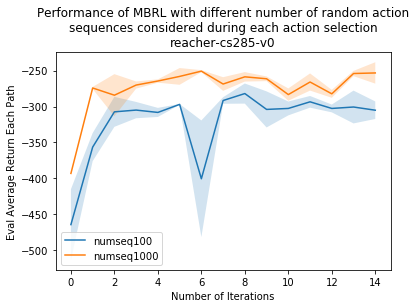

In [43]:
fig = plt.figure()
label_list = ['numseq100', 'numseq1000']
for i in range(2):
    result = result_list[i]
    plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[i])
    plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                     y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('Performance of MBRL with different number of random action\nsequences considered during each action selection\nreacher-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()

## Experiment 5: CEM

### Ensemble

In [62]:
ea_q5_cheetah_random_cheetah = event_accumulator.EventAccumulator('data/hw4_q5_cheetah_random_cheetah-cs285-v0_04-11-2021_00-36-56/events.out.tfevents.1636011416.triton2')
ea_q5_cheetah_cem_2 = event_accumulator.EventAccumulator('data/hw4_q5_cheetah_cem_2_cheetah-cs285-v0_04-11-2021_00-37-28/events.out.tfevents.1636011448.triton2')
ea_q5_cheetah_cem_4 = event_accumulator.EventAccumulator('data/hw4_q5_cheetah_cem_4_cheetah-cs285-v0_04-11-2021_00-38-13/events.out.tfevents.1636011493.triton2')
ea_list = [ea_q5_cheetah_random_cheetah, ea_q5_cheetah_cem_2, ea_q5_cheetah_cem_4]
ea_list = [ea.Reload() for ea in ea_list]
ea_q5_cheetah_random_cheetah.Tags()

{'images': ['train_rollouts', 'eval_rollouts'],
 'audio': [],
 'histograms': [],
 'scalars': ['Eval_AverageReturn',
  'Eval_StdReturn',
  'Eval_MaxReturn',
  'Eval_MinReturn',
  'Eval_AverageEpLen',
  'Train_AverageReturn',
  'Train_StdReturn',
  'Train_MaxReturn',
  'Train_MinReturn',
  'Train_AverageEpLen',
  'Train_EnvstepsSoFar',
  'TimeSinceStart',
  'Training_Loss',
  'Initial_DataCollection_AverageReturn'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [63]:
result_list = list(map(get_summary_df_ac, ea_list))
for result in result_list:
    display(result)

,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636012e+09,0,93.818787,0.0,-2493.047607
1,1.636012e+09,1,250.603134,0.0,127.231529
2,1.636012e+09,2,179.226990,0.0,252.762238
3,1.636013e+09,3,332.454590,0.0,265.261780
4,1.636013e+09,4,292.683624,0.0,291.051727


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636012e+09,0,149.504242,0.0,-2493.047607
1,1.636012e+09,1,330.127014,0.0,155.870239
2,1.636013e+09,2,421.873962,0.0,330.749695
3,1.636014e+09,3,466.713074,0.0,430.231049
4,1.636014e+09,4,566.442566,0.0,472.840149


,wall_time,step,Eval_AverageReturn,Eval_StdReturn,Train_AverageReturn
0,1.636012e+09,0,191.334045,0.0,-2493.047607
1,1.636013e+09,1,470.602386,0.0,212.405975
2,1.636014e+09,2,708.387451,0.0,455.700134
3,1.636016e+09,3,804.704102,0.0,684.620483
4,1.636017e+09,4,828.502563,0.0,755.286255


/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/lawrence/homework_fall2021/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


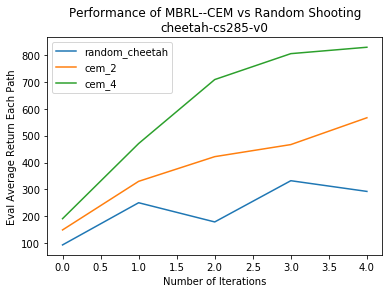

In [64]:
fig = plt.figure()
label_list = ['random_cheetah', 'cem_2', 'cem_4']
for i in range(3):
    result = result_list[i]
    plt.plot(result.step, result.Eval_AverageReturn, linestyle='-', label = label_list[i])
    plt.fill_between(x=result.step, y1=result.Eval_AverageReturn-result.Eval_StdReturn, 
                     y2=result.Eval_AverageReturn+result.Eval_StdReturn, alpha=0.2)
plt.legend()
plt.title('Performance of MBRL--CEM vs Random Shooting\ncheetah-cs285-v0')
plt.xlabel('Number of Iterations')
plt.ylabel('Eval Average Return Each Path')
plt.show()